In [55]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [39]:
b = projector(N_states,1,0)
a = basis(2,0)
b*a

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 0.]
 [ 1.]]

In [202]:
Ec = 1e8
Ej = 1e7
N_states = 200
n = num(N_states)
ng = 0
Hc = Ec*(n-ng)**2
ng_steps = 300

#

def projector(N,n,m):
    # |m><n| operator
    a = np.zeros((N,N),dtype = np.float64)
    if(n >= N or n < 0 or m >= N or m < 0):
        return Qobj(a)
    a[n,m] = 1
    return Qobj(a)

#



eigs = np.zeros((ng_steps,N_states), dtype=np.float64)
ng_space = np.linspace(1.5,5,ng_steps)
Hj = Qobj(projector(N_states,-1,-1))
for n in range(0,N_states):
    Hj = Hj - 0.5*Ej*(projector(N_states,n,n+1) + projector(N_states,n+1,n))
H = Hj + Hc
n = num(N_states)
for ng_id, ng in enumerate(ng_space):
    Hc = Ec*(n-ng)**2
    H = Hc + Hj
    eigs[ng_id,:] = H.eigenenergies()

waves = H.eigenstates()[1]


/usr/local/lib/python3.4/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3/dist-packages/matplotlib/figure.py:372: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


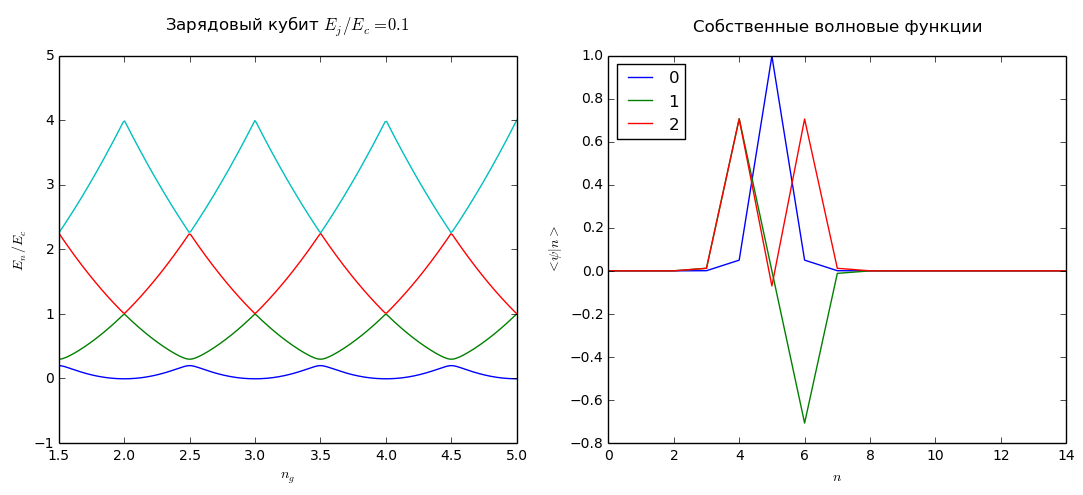

In [203]:
fig = plt.figure(figsize=(13,5),dpi=300)
charge = fig.add_subplot(121)
charge.set_title(r'Зарядовый кубит $E_j/E_c = 0.1$'+'\n')
charge.set_xlabel(r'$n_g$')
charge.set_ylabel(r'$E_n/E_c$')
charge.plot(ng_space,eigs[:,0:4]/Ec)
funcs = fig.add_subplot(122)
funcs.set_title(r'Собственные волновые функции'+'\n')
funcs.set_xlabel(r'$n$')
funcs.set_ylabel(r'$<\psi|n>$')

for i in range(0,3):
    funcs.plot(range(0,15),[x[0] for x in (waves[i])][0:15], label = str(i))
funcs.legend(bbox_to_anchor = [0,1], loc = "upper left")
fig.show()

/usr/local/lib/python3.4/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3/dist-packages/matplotlib/figure.py:372: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


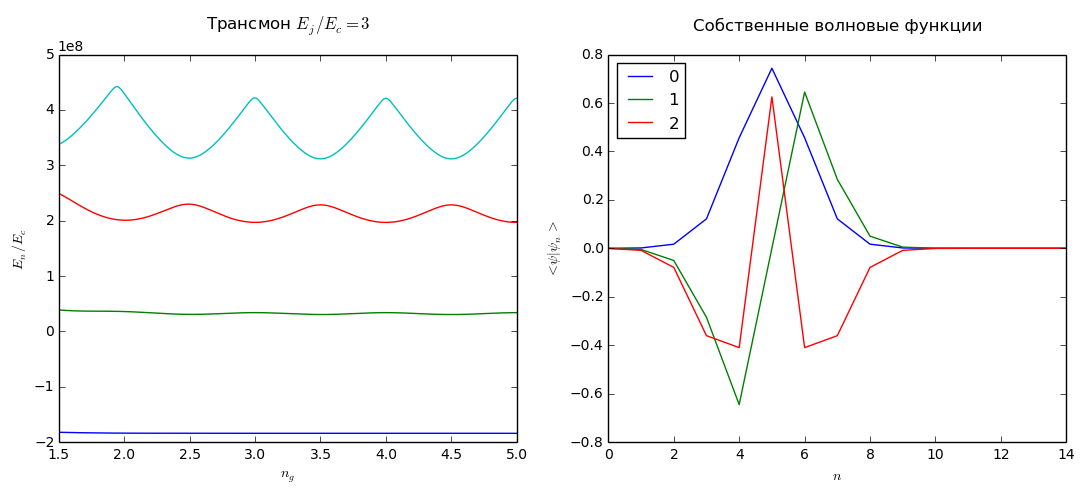

In [201]:
fig = plt.figure(figsize=(13,5),dpi=300)
charge = fig.add_subplot(121)
charge.set_title(r'Трансмон $E_j/E_c = 3$'+'\n')
charge.set_xlabel(r'$n_g$')
charge.set_ylabel(r'$E_n/E_c$')
charge.plot(ng_space,eigs[:,0:4])
funcs = fig.add_subplot(122)
funcs.set_title(r'Собственные волновые функции'+'\n')
funcs.set_xlabel(r'$n$')
funcs.set_ylabel(r'$<\psi|\psi_n>$')

for i in range(0,3):
    funcs.plot(range(0,15),[x[0] for x in (waves[i])][0:15], label = str(i))
funcs.legend(bbox_to_anchor = [0,1], loc = "upper left")
fig.show()